<a href="https://colab.research.google.com/github/Vignesh132006/CSS.day4-task1-/blob/main/Ex5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload a traffic image:


Saving IMG-20250830-WA0004.jpg to IMG-20250830-WA0004.jpg
Uploaded: IMG-20250830-WA0004.jpg
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:01<00:00, 107MB/s]


Traffic Analysis Results:


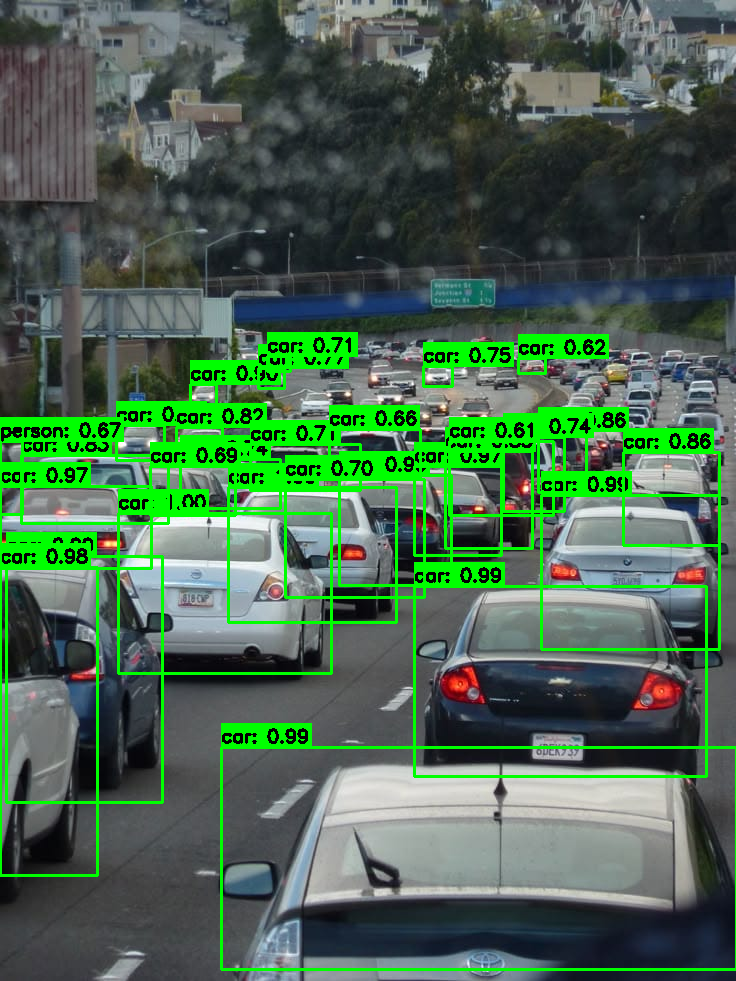

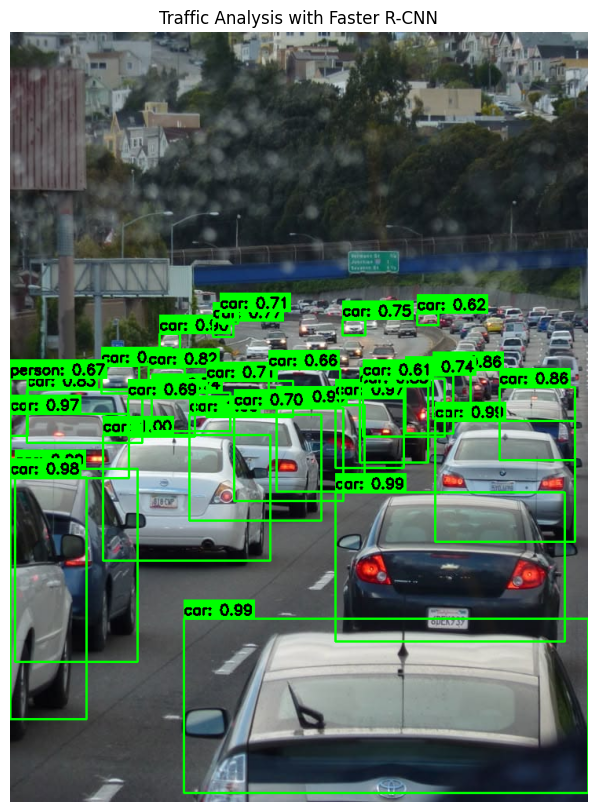


Detection Statistics:
Total objects detected: 29
car: 28
person: 1

Result saved as: detected_traffic.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install required packages
!pip install torch torchvision Pillow opencv-python

# Import necessary libraries
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
import cv2
from PIL import Image
import torchvision.transforms as T
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt

# Upload image
print("Please upload a traffic image:")
uploaded = files.upload()

# Get the uploaded filename
img_path = list(uploaded.keys())[0]
print(f"Uploaded: {img_path}")

# Load the model
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn(weights=weights)
model.eval()

# Define transform
transform = T.Compose([T.ToTensor()])

# Load and process image
img = Image.open(img_path).convert("RGB")
img_tensor = transform(img).unsqueeze(0)

# Make prediction
with torch.no_grad():
    predictions = model(img_tensor)

# Extract predictions
pred_boxes = predictions[0]['boxes'].cpu().numpy()
pred_scores = predictions[0]['scores'].cpu().numpy()
pred_labels = predictions[0]['labels'].cpu().numpy()

# Convert image for OpenCV
img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
img_display = img_cv.copy()

# Draw detections
for box, score, label in zip(pred_boxes, pred_scores, pred_labels):
    if score > 0.6:  # Confidence threshold
        x1, y1, x2, y2 = map(int, box)

        # Draw bounding box
        cv2.rectangle(img_display, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Prepare label text
        class_name = weights.meta['categories'][label]
        text = f"{class_name}: {score:.2f}"

        # Draw text background
        (text_width, text_height), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
        cv2.rectangle(img_display, (x1, y1 - text_height - 10), (x1 + text_width, y1), (0, 255, 0), -1)

        # Draw text
        cv2.putText(img_display, text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

# Display results in Colab
print("Traffic Analysis Results:")
cv2_imshow(img_display)

# Also display with matplotlib for better quality
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Traffic Analysis with Faster R-CNN')
plt.show()

# Print detection statistics
print("\nDetection Statistics:")
vehicle_count = {}
for box, score, label in zip(pred_boxes, pred_scores, pred_labels):
    if score > 0.6:
        class_name = weights.meta['categories'][label]
        vehicle_count[class_name] = vehicle_count.get(class_name, 0) + 1

print(f"Total objects detected: {sum(vehicle_count.values())}")
for vehicle, count in vehicle_count.items():
    print(f"{vehicle}: {count}")

# Save the result
output_path = "detected_traffic.jpg"
cv2.imwrite(output_path, img_display)
print(f"\nResult saved as: {output_path}")

# Download the result
files.download(output_path)